# **N-Beats in Keras for predicting Temperature**

## **<span style='color:green'> Contents:</span>**<a id="Table"></a>

* [Import the libraries](#Import)
* [Dataset Information](#Dataset)
* [Univariate time series for N-Beats](#Univariate)
* [Multivariate time series for N-Beats](#Multivariate)

## **<span style = 'color:green'>1. Import the required libraries</span>**<a id ="Import"></a>

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pip install keras-beats

  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.0/132.0 kB 429.3 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.8/14.8 MB 12.7 MB/s eta 0:00:00
  Created wheel for wrapt: filename=wrapt-1.12.1-cp37-cp37m-linux_x86_64.whl size=77057 sha256=f0189a3e58bd5cebe3a36615e2b76eb0fdd60254f1e2d36caeab3a8e03ae4da4
  Stored in directory: /root/.cache/pip/wheels/62/76/4c/aa25851149f3f6d9785f6c869387ad82b3fd37582fa8147ac6
Successfully built wrapt
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.14.1
    Uninstalling wrapt-1.14.1:
      Successfully uninstalled wrapt-1.14.1
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.1.1
    Uninstalling typing_extensions-4.1.1:
      Successfully uninstalled typing_extensions-4.1.1
  Attempting uninstall: six
    Found existing installation: six 1.16.0
    Uninstalling six-1.16.0:
      Successfully uninstalled six-1.16.0
  Attemptin

## **<span style = 'color:green'>2. Dataset information</span>**<a id ='Dataset'></a>
[<div style="text-align: right"> Back to Table of contents</div>](#Table)
​
This dataset provides data from 1st January 2013 to 24th April 2017 in the city of Delhi, India. The 4 parameters here are meantemp, humidity, wind_speed, meanpressure. 

In [3]:
# import the dataset
df = pd.read_csv('../input/daily-climate-time-series-data/DailyDelhiClimateTrain.csv',  parse_dates = ['date'], index_col = 'date')
# sort by dates
df.sort_index(inplace = True)
df

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...
2016-12-28,17.217391,68.043478,3.547826,1015.565217
2016-12-29,15.238095,87.857143,6.000000,1016.904762
2016-12-30,14.095238,89.666667,6.266667,1017.904762


## **<span style='color:green'>Univariate time series for N-Beats</span>**<a id ='Univariate'></a>
[<div style="text-align: right"> Back to Table of contents</div>](#Table)
prep_time_series is a helper function that creates training windows and their labels from the provided time series. 

This method accepts numpy arrays, lists, and pandas Series and DataFrames as input, but they must be one column if they are not then you’ll receive an error message.

The function contains two separate arguments:

horizon: how far out into the future you want to predict. A horizon value of 1 means you are predicting one step ahead. A value of two means you are predicting two steps ahead, and so on

lookback: what multiple of the horizon you want to use for training data. So if horizon is 1 and lookback is 5, your training window will be the previous 5 values. If horizon is 2 and lookback is 5, then your training window will be the previous 10 values.

lookback dictates the size of your training window, and horizon is how far into the future your model will predict. lookback creates the training window by determining the multiple of the horizon that you will use. A horizon of 1 and lookback of 7 will create a training window from the previous 7 values.

In [4]:
# prep a univariate time series for N-Beats
from kerasbeats import prep_time_series, NBeatsModel
X, y = prep_time_series(df['meantemp'], lookback = 7, horizon = 1)
# create training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle = False, test_size = 0.2)
# initialize N-Beats and fit
nbeats = NBeatsModel(model_type = 'generic', lookback = 7, horizon = 1)
nbeats.fit(X, y, epochs = 30)

2022-07-15 19:14:56.665277: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2022-07-15 19:14:57.821229: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/30
2/2 [==============================] - 11s 616ms/step - loss: 82.9824 - mae: 82.9824 - mape: 363.1065
Epoch 2/30
2/2 [==============================] - 2s 603ms/step - loss: 79.5845 - mae: 79.5845 - mape: 344.8813
Epoch 3/30
2/2 [==============================] - 2s 650ms/step - loss: 43.7069 - mae: 43.7069 - mape: 192.2846
Epoch 4/30
2/2 [==============================] - 2s 595ms/step - loss: 70.8902 - mae: 70.8902 - mape: 310.5433
Epoch 5/30
2/2 [==============================] - 2s 599ms/step - loss: 5.1322 - mae: 5.1322 - mape: 22.5006
Epoch 6/30
2/2 [==============================] - 2s 599ms/step - loss: 2.1433 - mae: 2.1433 - mape: 9.0888
Epoch 7/30
2/2 [==============================] - 2s 600ms/step - loss: 1.6064 - mae: 1.6064 - mape: 7.0780
Epoch 8/30
2/2 [==============================] - 2s 604ms/step - loss: 1.7540 - mae: 1.7540 - mape: 7.4037
Epoch 9/30
2/2 [==============================] - 2s 593ms/step - loss: 1.8365 - mae: 1.8365 - mape: 8.1147
Epoch 10/3

Model type can be ‘generic’ or ‘interpretable’. If using the interpretable model, it is better to set horizon to at least 2. Due to the way some other parameters are specified, the matrix math typically only works if predicting for more than one day out.

The above code with no optimizations would provide the following results:

In [5]:
import numpy as np
# helper dataframe to make plotting easier
preds = pd.DataFrame(index = np.arange(len(y_train) + len(y_test)))
preds['Real Value'] = np.hstack([y_train[:, 0], y_test[:, 0]])
preds['Prediction'] = np.hstack([nbeats.predict(X_train)[:, 0], nbeats.predict(X_test)[:, 0]])
# and plot the predictions
import plotly.express as px
fig = px.line(preds[['Real Value', 'Prediction']], title = 'Real vs Predicted Values for N-Beats')
# random formatting stuff
fig.add_vline(x = 1164, line_width=3, line_dash='dash', line_color='green')
fig.add_annotation(x = 1000, y = 10,
 text='Training Data',
 font=dict(size=15),
 showarrow=False)
fig.add_annotation(x = 1300, y = 10,
 text='Test Data',
 font=dict(size=15),
 showarrow=False)

In [6]:
def model_train_evaluation(y, ypred, model_name): 
       
    # Model Evaluation metrics
    from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score, r2_score, mean_absolute_percentage_error
    print("\n \n Model Evaluation Report: ")
    print('Mean Absolute Error(MAE) of', model_name,':', mean_absolute_error(y, ypred))
    print('Mean Squared Error(MSE) of', model_name,':', mean_squared_error(y, ypred))
    print('Root Mean Squared Error (RMSE) of', model_name,':', mean_squared_error(y, ypred, squared = False))
    print('Mean absolute percentage error (MAPE) of', model_name,':', mean_absolute_percentage_error(y, ypred))
    print('Explained Variance Score (EVS) of', model_name,':', explained_variance_score(y, ypred))
    print('R2 of', model_name,':', (r2_score(y, ypred)).round(2))
    print('\n \n')
    
    # Actual vs Predicted Plot
    f, ax = plt.subplots(figsize=(12,6),dpi=100);
    plt.scatter(y, ypred, label="Actual vs Predicted")
    # Perfect predictions
    plt.xlabel('Indoor Temperature in celsius')
    plt.ylabel('Indoor Temperature in celsius')
    plt.title('Expection vs Prediction')
    plt.plot(y,y,'r', label="Perfect Expected Prediction")
    plt.legend()
    f.text(0.95, 0.06, 'AUTHOR: RINI CHRISTY',
         fontsize=12, color='green',
         ha='left', va='bottom', alpha=0.5);
    
    print('\n \n \n \n')
    fig,ax=plt.subplots(figsize=(15,8))
    plt.plot(y, label='Actual values', color = 'blue')
    plt.plot(ypred, label='Predicted values', color = 'red')
    plt.legend(loc='best')
    plt.title(f'Actual vs Predicted for {model_name}')
    plt.show()


 
 Model Evaluation Report: 
Mean Absolute Error(MAE) of Nbeats : 1.2705477117904231
Mean Squared Error(MSE) of Nbeats : 2.8556609654128366
Root Mean Squared Error (RMSE) of Nbeats : 1.6898701031182357
Mean absolute percentage error (MAPE) of Nbeats : 0.05388859947563961
Explained Variance Score (EVS) of Nbeats : 0.9465313748040338
R2 of Nbeats : 0.95

 


 
 
 



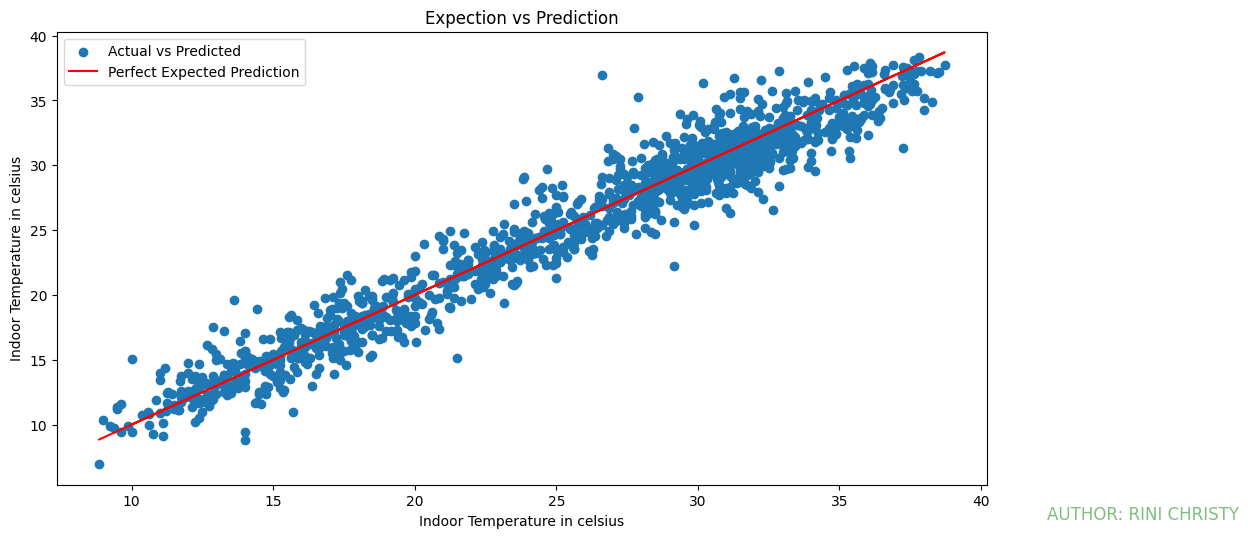

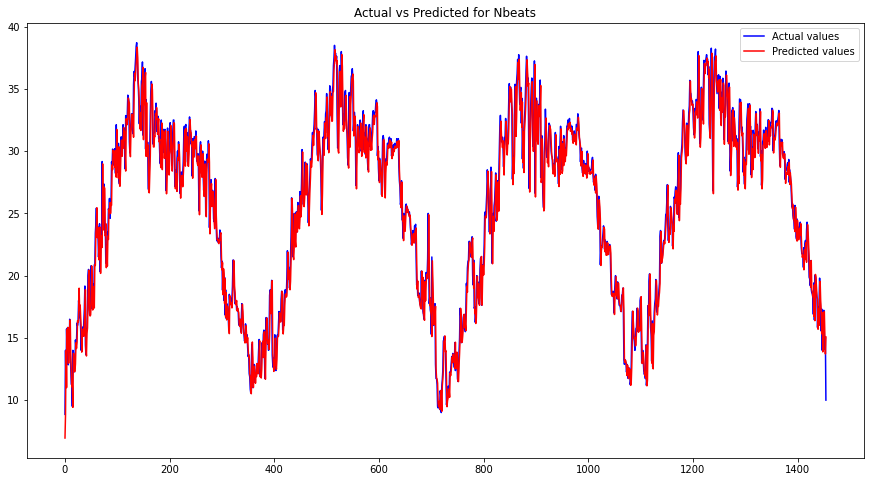

In [7]:
model_train_evaluation(preds['Real Value'], preds['Prediction'], 'Nbeats')

## **<span style='color:green'>Using KerasBeats as a keras model¶</span>**<a id ='Box-Jenkins'></a>
[<div style="text-align: right"> Back to Table of contents</div>](#Table)

When you call fit using the NBeatsModel wrapper, the compile step is done automatically. However, it is possible to access some underlying keras functionality that’s not directly available in NBeatsModel. To define a separate loss functions, or define callbacks, the fully built keras model can be accessed in the following way:

After these two lines, the model attributes can be accessed, which will give access to the full keras model. In order to specify a different loss function or optimizer, this can be done easily as follows:

Please note that if you want to use the underlying keras model directly, you should use nbeats.model.fit() and not nbeats.fit, since it will try and compile the model for you automatically after you call it.

from keras.optimizers import rmsprop_v2

#from keras import optimizers

nbeats.model.compile(loss = 'mse', optimizer = 'rmsprop')

nbeats.model.fit(X, y)

The most basic building block in kerasbeats is the model_layer , which is the collection of stacked blocks that are used to build the forecasts. If you just want this to use in larger projects, you can do it with the build_layer method: 

In [8]:
# initialize
nbeats = NBeatsModel(model_type = 'generic', lookback = 7, horizon = 1)
nbeats.build_layer()
# this is the base NBeats layer that’s used to construct the model
nbeats.model_layer

## **<span style='color:green'>Multivariate time series for N-Beats</span>**<a id ='Multivariate'></a>
[<div style="text-align: right"> Back to Table of contents</div>](#Table)
To incorporate non-time series elements information about humidity, windspeed and airpressure into the predictions, combine those with the NBeats model in the following way:

In [9]:
df.describe()

,meantemp,humidity,wind_speed,meanpressure
count,1462.000000,1462.000000,1462.000000,1462.000000
mean,25.495521,60.771702,6.802209,1011.104548
std,7.348103,16.769652,4.561602,180.231668
min,6.000000,13.428571,0.000000,-3.041667
25%,18.857143,50.375000,3.475000,1001.580357
50%,27.714286,62.625000,6.221667,1008.563492
75%,31.305804,72.218750,9.238235,1014.944901
max,38.714286,100.000000,42.220000,7679.333333


{'whiskers': [<matplotlib.lines.Line2D at 0x7efd5d6d0110>,
 'caps': [<matplotlib.lines.Line2D at 0x7efd5d6d0750>,
 'boxes': [<matplotlib.lines.Line2D at 0x7efd5d739310>],
 'medians': [<matplotlib.lines.Line2D at 0x7efd5d6d0e10>],
 'fliers': [<matplotlib.lines.Line2D at 0x7efd5d6dc190>],
 'means': []}

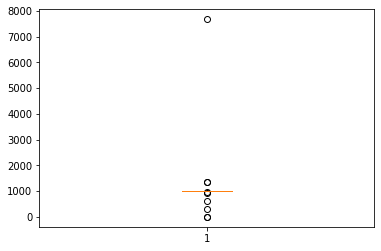

In [10]:
plt.boxplot(df.meanpressure)

In [11]:
df[df['meanpressure'] == df['meanpressure'].max()]

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2016-03-28,25.933333,52.8,6.546667,7679.333333


In [12]:
df['meanpressure'] = df['meanpressure'].replace(df['meanpressure'].max(), df['meanpressure'].mean())

In [13]:
from tensorflow import keras
time_input = keras.layers.Input(shape = (7, ))
# layer we created from the previous block
nbeats_layer = nbeats.model_layer(time_input)
# input for non time data
non_time_input = keras.layers.Input(shape = (3,))
x = keras.layers.Dense(32, activation = 'relu')(non_time_input)
#concatenate the layers and combine into a model
concat = keras.layers.Concatenate()([nbeats_layer, x])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs = [time_input, non_time_input], outputs = output)

In [14]:
# create training data from non time values
# excluding the first 7 values to match our time series data
X_non_time = df[['humidity', 'wind_speed', 'meanpressure']].values[7:]
# compile the model and fit
model.compile(loss = 'mae')
model.fit([X, X_non_time], y)

46/46 [==============================] - 24s 152ms/step - loss: 131373.2188


In [15]:
X, y = prep_time_series(df['meantemp'], lookback = 7, horizon = 1)
# create training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle = False, test_size = 0.2)
X_non_time_train, X_non_time_test, = train_test_split(X, shuffle = False, test_size = 0.2)
# helper dataframe to make plotting easier
preds = pd.DataFrame(index = np.arange(len(y)))
#preds['Real Value'] = y
preds['Prediction'] = model.predict([[X, X_non_time]])
preds['Real Value'] = np.hstack([y_train[:, 0], y_test[:, 0]])
#preds['Prediction'] = np.hstack([model.predict([X_train, X_non_time_train]), model.predict([X_test, X_non_time_test])])
# and plot the predictions
import plotly.express as px
fig = px.line(preds[['Real Value', 'Prediction']], title = 'Real vs Predicted Values for N-Beats')
# random formatting stuff
fig.add_vline(x = 1164, line_width=3, line_dash='dash', line_color='green')
fig.add_annotation(x = 1000, y = 10,
 text='Training Data',
 font=dict(size=15),
 showarrow=False)
fig.add_annotation(x = 1300, y = 10,
 text='Test Data',
 font=dict(size=15),
 showarrow=False)


 
 Model Evaluation Report: 
Mean Absolute Error(MAE) of Nbeats : 6.455529887689522
Mean Squared Error(MSE) of Nbeats : 64.31228550511499
Root Mean Squared Error (RMSE) of Nbeats : 8.019494092841205
Mean absolute percentage error (MAPE) of Nbeats : 0.3454461691538329
Explained Variance Score (EVS) of Nbeats : -0.09960598624138872
R2 of Nbeats : -0.22

 


 
 
 



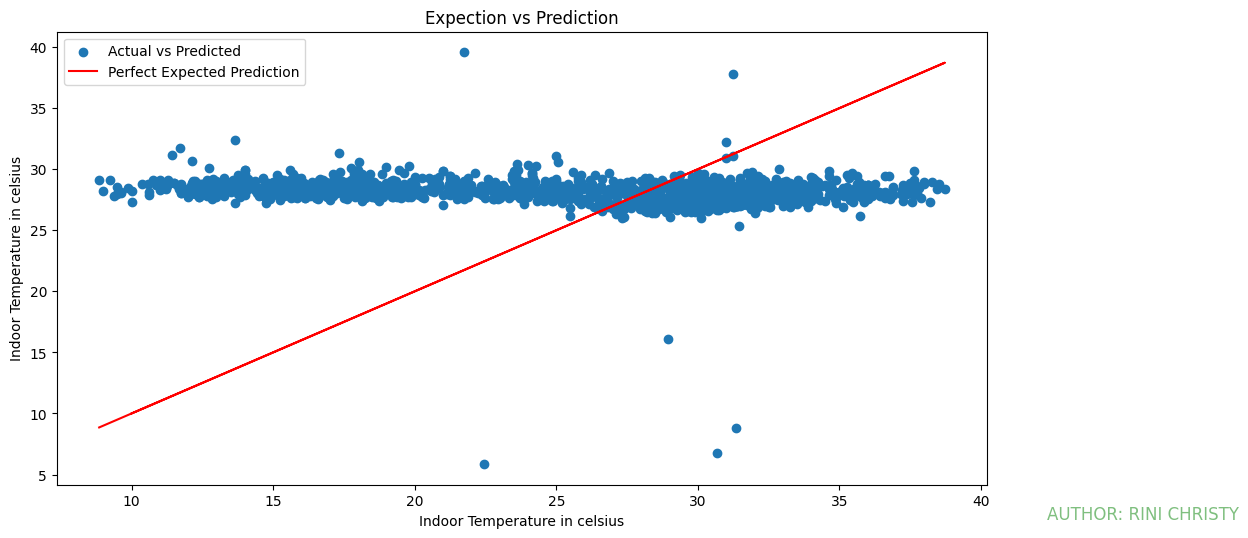

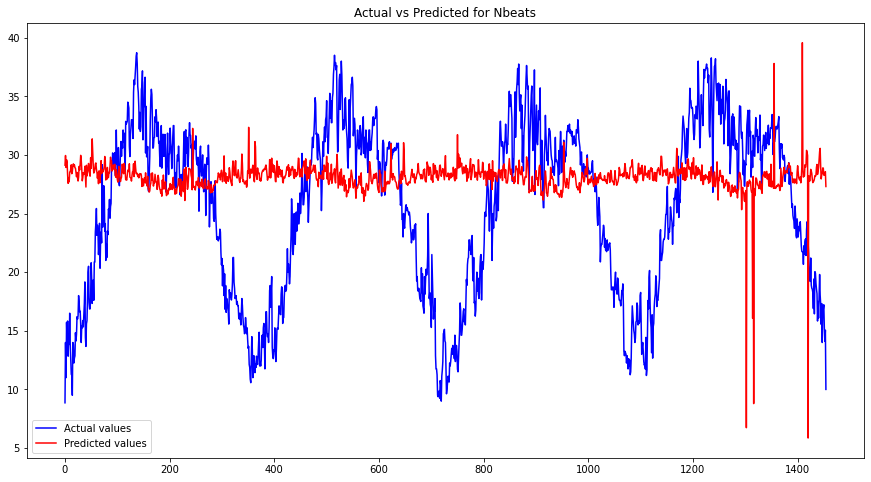

In [16]:
model_train_evaluation(preds['Real Value'], preds['Prediction'], 'Nbeats')

## **References**
1. [KerasBeats: An Easy Way to Use N-Beats in Keras](https://medium.com/@jonathanbechtel/kerasbeats-an-easy-way-to-use-n-beats-in-keras-395b24c5cc28)
2. [KerasBeats](https://kerasbeats.readthedocs.io/en/latest/#)